In [103]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style='white',palette='muted',color_codes=True)
plt.style.use('ggplot')
import plotly.express as px 

In [104]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import silhouette_score,accuracy_score,r2_score,mean_squared_error,confusion_matrix 
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [105]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [107]:
data.duplicated().sum()
data.drop_duplicates(keep='first',subset=None,ignore_index=False,inplace=True)
data.duplicated().sum()

0

In [108]:
mis_val = data.isna().sum() * 100/len(data)
mis_val.sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

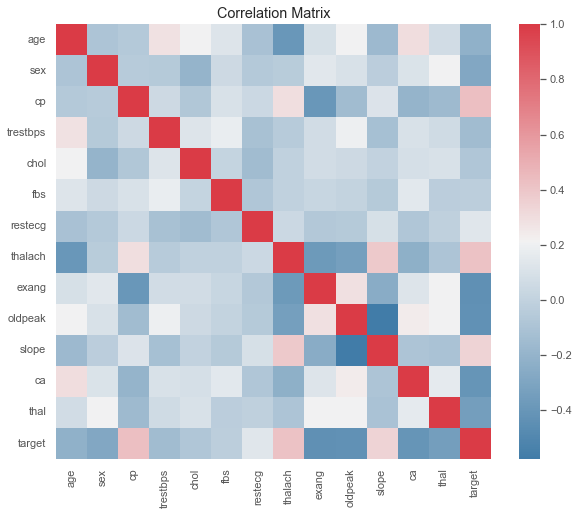

In [109]:
f,ax = plt.subplots(figsize=(10,8))

data_corr = data.corr()

sns.heatmap(data_corr,mask=np.zeros_like(data_corr,dtype=np.bool_),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax=ax)
ax.set_title('Correlation Matrix')

In [110]:
data.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='Count'>

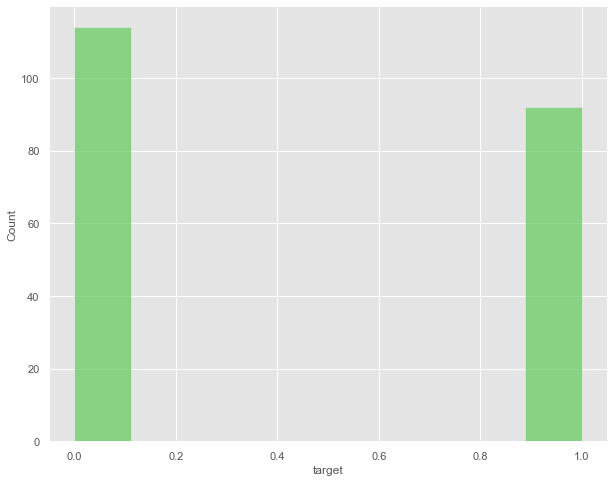

In [111]:
f,ax = plt.subplots(figsize=(10,8)) 

sns.histplot(data[(data.sex == 1)]['target'],color='g',ax=ax)

In [112]:
y = data.target 
x = data.drop(columns=['target'],axis=1)

num_val = ['age','trestbps','chol','thalach','oldpeak']
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [113]:
trans_col = ColumnTransformer( 
    [ 
        ('num',StandardScaler(),num_val),
        ('cat',OrdinalEncoder(),cat_val)
    ]
)

x = pd.DataFrame(trans_col.fit_transform(x))
x.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1.0,3.0,0.0,0.0,0.0,0.0,1.0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1.0,2.0,1.0,0.0,0.0,0.0,2.0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0.0,1.0,0.0,0.0,2.0,0.0,2.0


In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [115]:
logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

scr_acc = accuracy_score(y_test,y_pred)

In [116]:
mod_per = pd.DataFrame([
    'LogisticRegression', scr_acc
]).transpose()

mod_per.columns = ['Metthod', 'Accuracy Test Score']

mod_per

,Metthod,Accuracy Test Score
0,LogisticRegression,0.824176


<AxesSubplot:xlabel='Predicted Values', ylabel='True Values'>

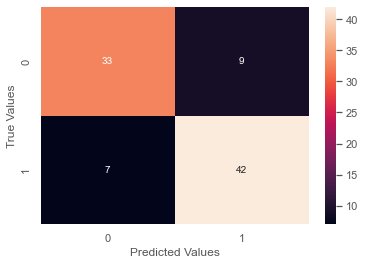

In [117]:
cm_dic = { 
    'y_test':y_test,
    'y_pred':y_pred
}

cm_cols = pd.DataFrame( 
    cm_dic, columns=['y_test', 'y_pred']
)

confusion_matrix = pd.crosstab( 
    cm_cols['y_test'],cm_cols['y_pred'],rownames=['True Values'],colnames=['Predicted Values']
)

sns.heatmap(confusion_matrix,annot=True)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

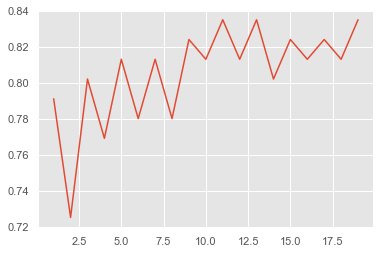

In [118]:
accuracies = []

for N in range(1,20):

    knn = KNeighborsClassifier(n_neighbors=N)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)

    accu = accuracy_score(y_test,y_pred)
    accuracies.append(accu)

accuracies = np.array(accuracies)

sns.lineplot(np.arange(1,20),accuracies)

In [119]:
best_k = np.argmax(accuracies)
best_k

10

In [120]:
best_accu = np.max(accuracies)
best_accu

0.8351648351648352